

---

# Introduction to Data Visualization with Seaborn (v0.13.2)

---

## 1) Changing plot style and color

- Why customize?
  - Personal preference and brand consistency.
  - Improve readability (contrast, grids, font sizes).
  - Direct attention to comparisons or exact values depending on the audience and goal.

---

## 2) Figure styles (set_style)

Seaborn provides five preset styles that change the background and axes:
- "white" (default)
- "whitegrid"
- "dark"
- "darkgrid"
- "ticks"

Set a global style with `sns.set_style()`.

### 2.1 Default style: "white"

Example: point plot of the percentage of men who say masculinity is important, by age and whether they feel masculine.

Assumptions for code below:
- DataFrame `masculinity_data` with columns: `age`, `masculinity_important`, `feel_masculine`.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Set default style (white)
sns.set_style("white")

# 2) Create point plot
g = sns.catplot(
    x="age",
    y="masculinity_important",
    data=masculinity_data,
    hue="feel_masculine",
    kind="point"
)

# 3) Show figure
plt.show()
```
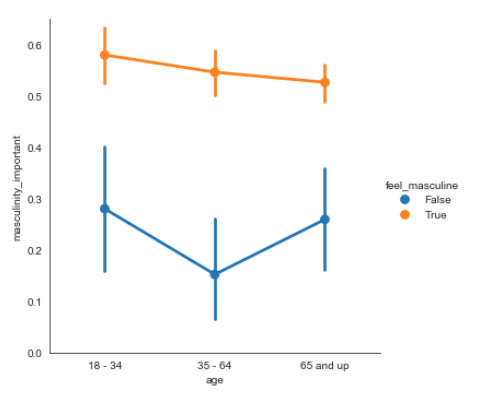


Expected output (description):
- A point plot with:
  - X-axis: age groups.
  - Y-axis: percentage considering masculinity important.
  - Different colors for `feel_masculine` groups.
  - Clean white background; no grid.

Line-by-line explanation:
- `import seaborn as sns`: import Seaborn for statistical plots.
- `import matplotlib.pyplot as plt`: import Matplotlib for figure control and display.
- `sns.set_style("white")`: set global style to “white”; purpose: clean look emphasizing comparisons; result: white background without grid.
- `g = sns.catplot(...)`:
  - `x="age"`: map age to x-axis.
  - `y="masculinity_important"`: map importance to y-axis.
  - `data=masculinity_data`: provide the dataset.
  - `hue="feel_masculine"`: split series by feeling masculine.
  - `kind="point"`: show point estimates and CIs.
  - Purpose: visualize trends and group differences.
  - Result: points and lines showing means across categories.
- `plt.show()`: render the plot.

Significance:
- Good when you care about comparisons/trends rather than exact values.

### 2.2 Style: "whitegrid"

Adds a gray grid that helps read exact values.

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
g = sns.catplot(
    x="age",
    y="masculinity_important",
    data=masculinity_data,
    hue="feel_masculine",
    kind="point"
)
plt.show()
```
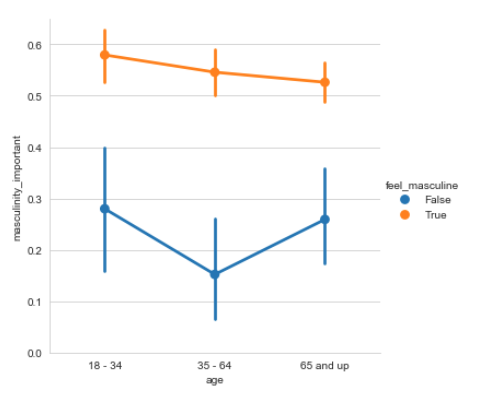


Expected output (description):
- Same point plot with a light gray grid.

Line-by-line highlight:
- `sns.set_style("whitegrid")`: turn on grid; purpose: aid precise value reading; result: grid lines behind data.

Significance:
- Useful when the audience needs to estimate actual values.

### 2.3 Other styles: "ticks", "dark", "darkgrid"

- "ticks": like "white", with more prominent tick marks.
- "dark": gray background, no grid.
- "darkgrid": gray background with white grid.

Compare styles quickly:

```python
for style in ["ticks", "dark", "darkgrid"]:
    sns.set_style(style)
    g = sns.catplot(
        x="age",
        y="masculinity_important",
        data=masculinity_data,
        hue="feel_masculine",
        kind="point"
    )
    g.fig.suptitle(f"Style: {style}", y=1.02)
    plt.show()
```
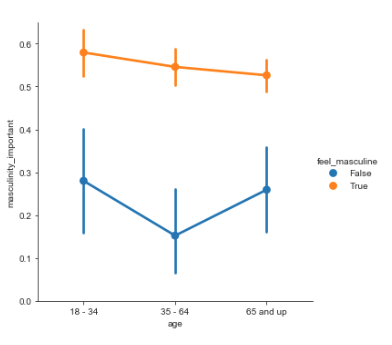  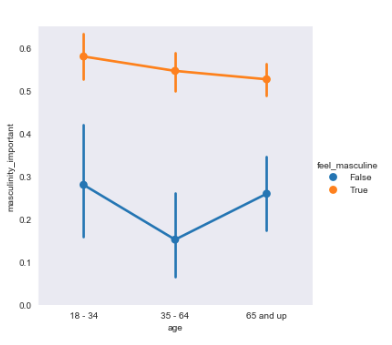   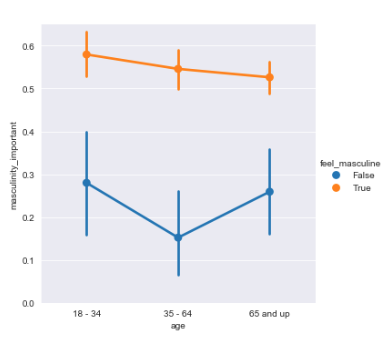
Expected output (description):
- Three figures showing the same data with different backgrounds/axes styling.

Line-by-line:
- `for style in [...]`: iterate styles to compare visually.
- `sns.set_style(style)`: apply current style.
- `sns.catplot(...)`: same plot for apples-to-apples comparison.
- `g.fig.suptitle(...)`: add a title labeling the style; `y=1.02` adds spacing.
- `plt.show()`: display each figure.

Significance:
- Side-by-side comparison helps pick the most legible option for your context.

---

## 3) Color palettes (set_palette)

With `sns.set_palette()` you can:
- Use named preset palettes (diverging, sequential, etc.).
- Reverse a palette by appending `_r`.
- Define custom palettes with color names or hex codes.

Reference: Seaborn documentation sections “Color palettes: API | Tutorial”.

### 3.1 Diverging palettes

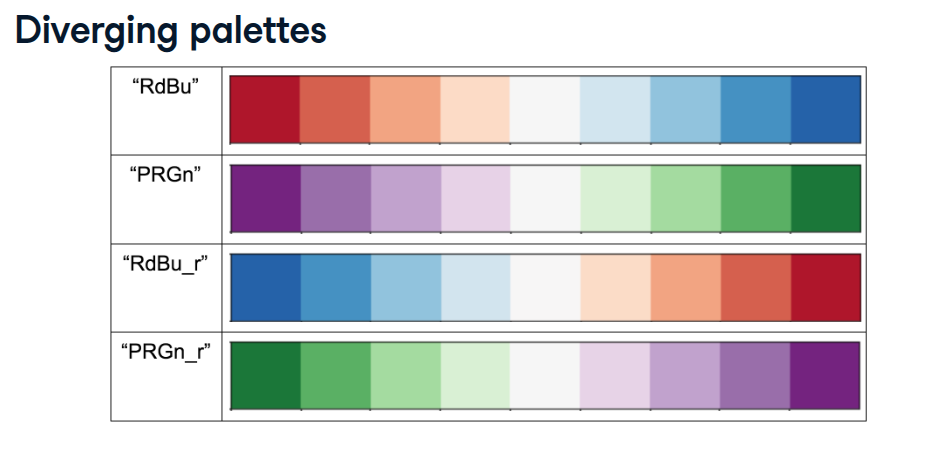

Best when a scale has opposite ends and a neutral midpoint (e.g., negative vs positive).

Slide example: “RdBu” applied to a count plot of self-reported masculinity.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Set a diverging palette
sns.set_palette("RdBu")

# 2) Category order (from slide)
category_order = ["No answer", "Not at all", "Not very", "Somewhat", "Very"]

# 3) Count plot
ax = sns.catplot(
    x="how_masculine",
    data=masculinity_data,
    kind="count",
    order=category_order
)

# 4) Show
plt.show()
```
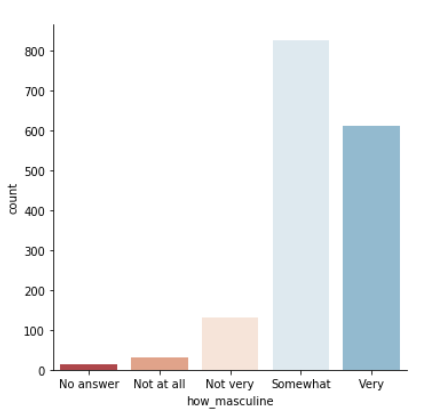

Expected output (description):
- Bars per category on x-axis, colored with RdBu sequence.
- Ordered progression from “No answer” to “Very.”

Line-by-line:
- `sns.set_palette("RdBu")`: use red-blue diverging palette; purpose: clear contrast between low and high ends; result: consistent colors across categories.
- `category_order = [...]`: explicit ordering; purpose: semantic progression; result: logical x-axis.
- `ax = sns.catplot(..., kind="count", ...)`: count observations per category; result: bar heights reflect frequencies.
- `plt.show()`: render the chart.

Significance:
- Enhances differentiation between opposing categories; eases interpretation of extremes.
- To reverse: `sns.set_palette("RdBu_r")`.

### 3.2 Sequential palettes

Single or blended colors moving light-to-dark. Great for continuous variables.

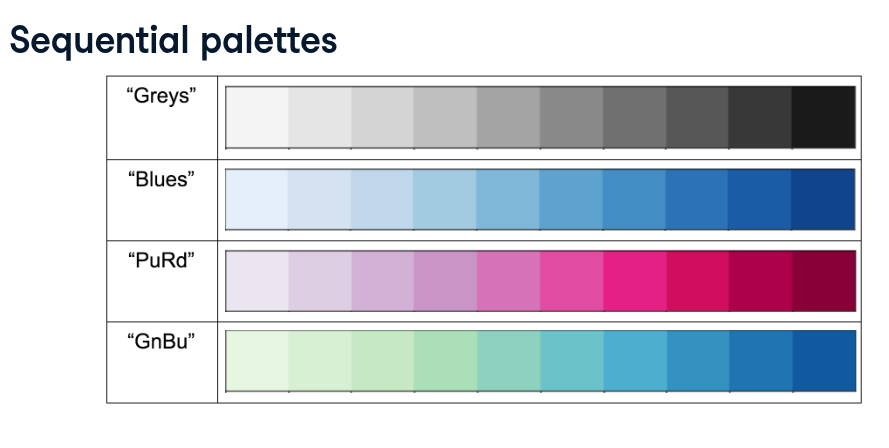

Transcript example: horsepower vs. mpg scatter; darker/larger points for more cylinders. Below, we illustrate with a sequential palette mapped to a continuous variable.

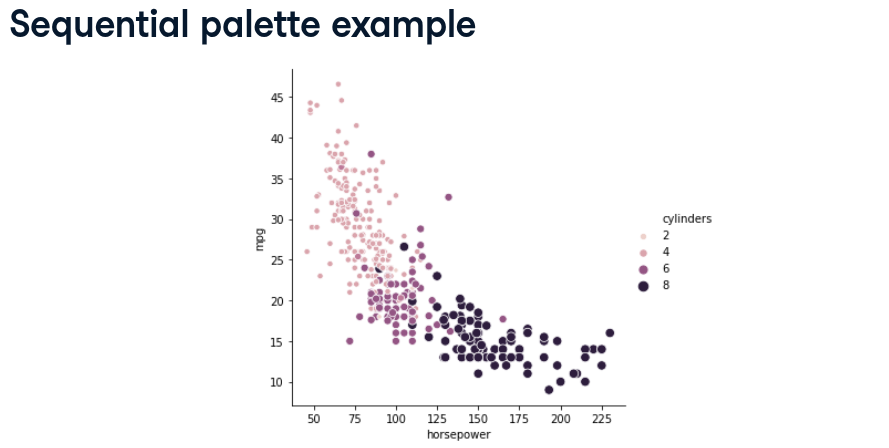

Assumptions:
- DataFrame `df_cars` with columns: `mpg`, `horsepower`, `cylinders`.

```python
sns.set_style("whitegrid")
sns.set_palette("Blues")  # sequential palette

```

Significance:
- Sequential palettes highlight intensity or magnitude; useful for heatmaps, continuous hue mappings, or ordered categories.

### 3.3 Custom palettes

Pass either:
- Color names 
- Hex codes.

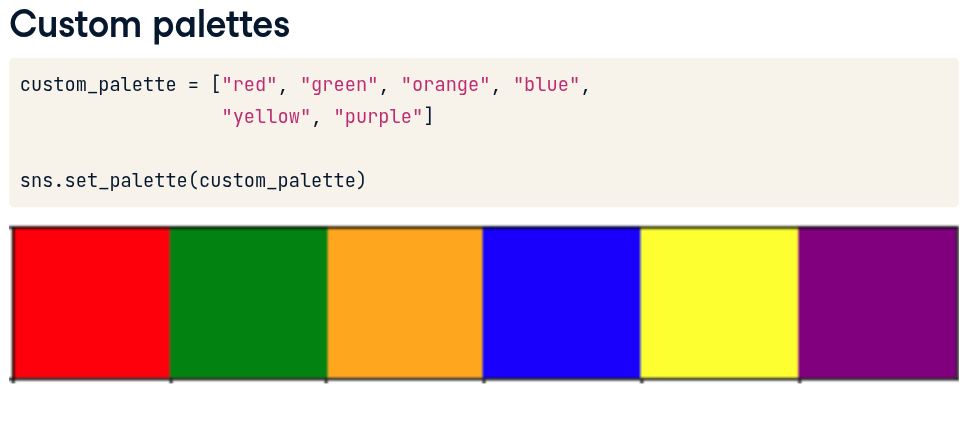

Example 1 (names):



Explanation:
- `custom_palette`: ordered list of color names.
- `sns.set_palette(custom_palette)`: apply globally; purpose: branding or preference; result: consistent custom colors.

Example 2 (hex codes):


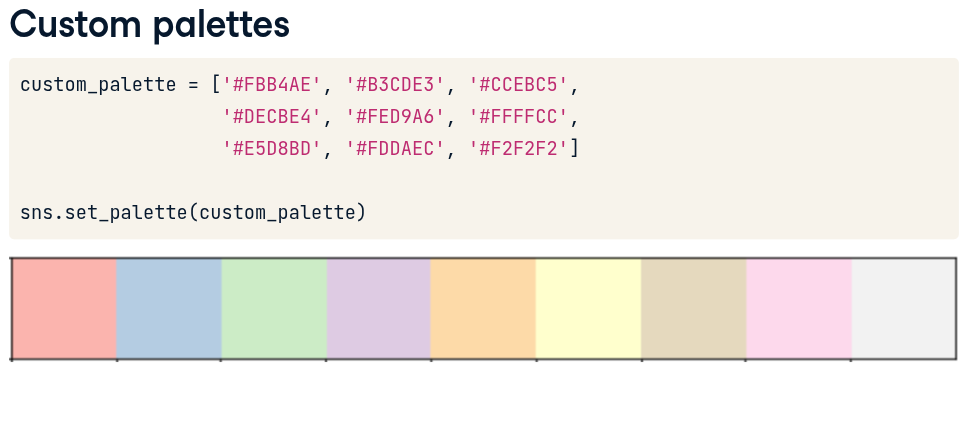

Explanation:
- Hex list gives precise colors; good for accessibility/brand requirements.

---

## 4) Changing the scale (set_context)

Use `sns.set_context()` to change the scale of plot elements (fonts, line widths, markers). From smallest to largest:
- "paper" (default)
- "notebook"
- "talk"
- "poster"

This changes visual scale only, not data.

### 4.1 Default context: "paper"

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Default context is "paper"
g = sns.catplot(
    x="age",
    y="masculinity_important",
    data=masculinity_data,
    hue="feel_masculine",
    kind="point"
)
plt.show()
```
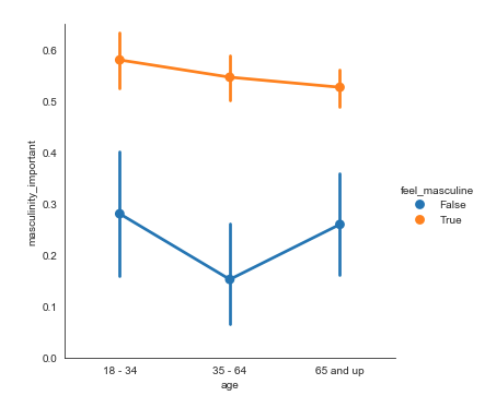

Expected output:
- Compact typography and elements suitable for documents/notebooks.

Explanation:
- No explicit `set_context`, so "paper" applies.

### 4.2 Larger context: "talk"

Good for slides/posters when viewers are farther away.

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
g = sns.catplot(
    x="age",
    y="masculinity_important",
    data=masculinity_data,
    hue="feel_masculine",
    kind="point"
)
plt.show()
```
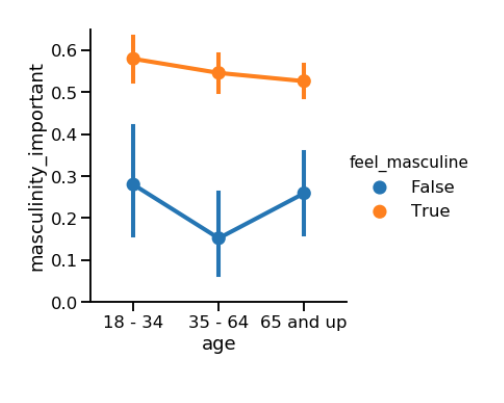

Expected output (description):
- Same plot with larger fonts, line widths, and markers.

Line-by-line:
- `sns.set_context("talk")`: scale up elements for presentation; purpose: readability at distance; result: larger visual elements.
- Remaining lines: same plot for direct comparison.
- `plt.show()`: render.

Significance:
- Choose context based on medium: paper/notebook vs. talks/posters.

---

## 5) Concept summary

- Style (`set_style`): controls background, axes, and grids.
  - "white"/"ticks": clean; "whitegrid": precise reading; "dark"/"darkgrid": high-contrast on darker backgrounds.
- Palette (`set_palette`): controls main colors.
  - Diverging: for scales with opposing ends and a neutral midpoint.
  - Sequential: for continuous magnitudes or ordered categories.
  - Custom: names or hex lists for branding/consistency.
- Context (`set_context`): scales fonts and graphic elements.
  - "paper" (default), "notebook", "talk", "poster" depending on medium.

Reference: Seaborn is a Python data visualization library based on Matplotlib, offering a high-level interface for attractive, informative statistical graphics. Explore gallery, tutorials, and API at https://seaborn.pydata.org/.

### Exercise
Changing style and palette
Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions 1/3
Set the style to "whitegrid" to help the audience determine the number of responses in each category.

```python
# Set the style to "whitegrid"
sns.set_style('whitegrid')

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

```
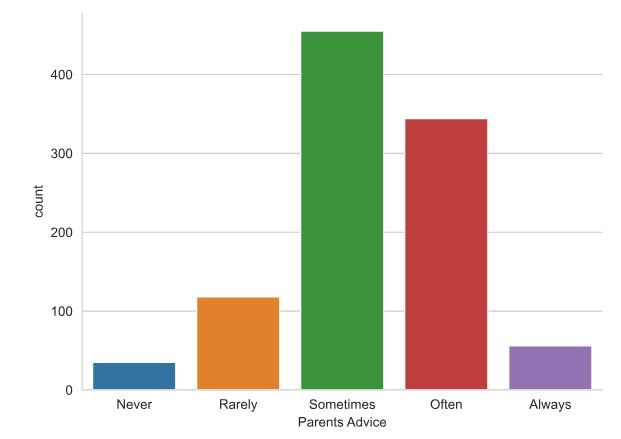

2. Set the color palette to the sequential palette named "Purples".


```python
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette('Purples')

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

```
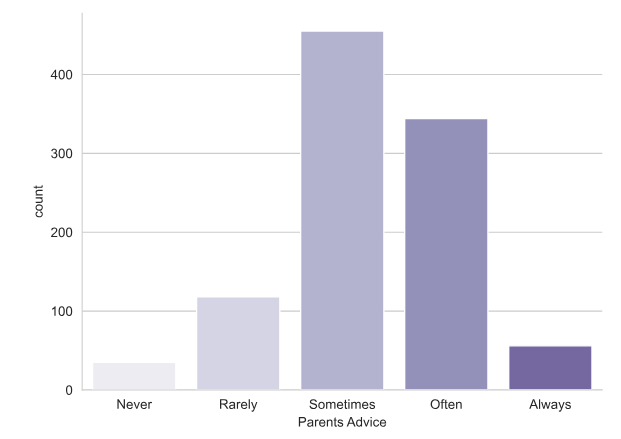

3. Change the color palette to the diverging palette named "RdBu".

```python
# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

```
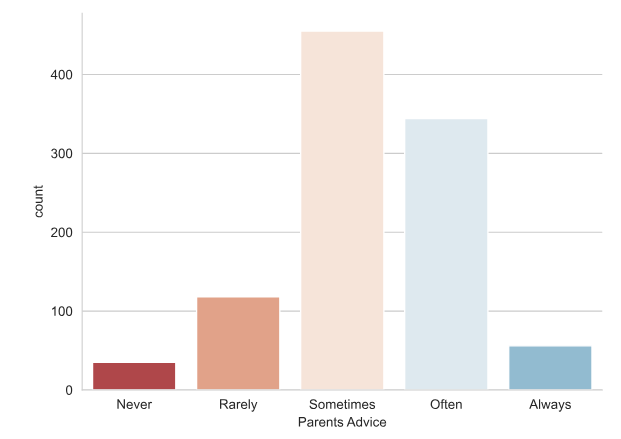

### Exercise
Changing the scale
In this exercise, we'll continue to look at the dataset containing responses from a survey of young people. Does the percentage of people reporting that they feel lonely vary depending on how many siblings they have? Let's find out using a bar plot, while also exploring Seaborn's four different plot scales ("contexts").

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions 1/4

Set the scale ("context") to "paper", which is the smallest of the scale options.

```python
# Set the context to "paper"
sns.set_context('paper')

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely",
            data=survey_data, kind="bar")

# Show plot
plt.show()

```
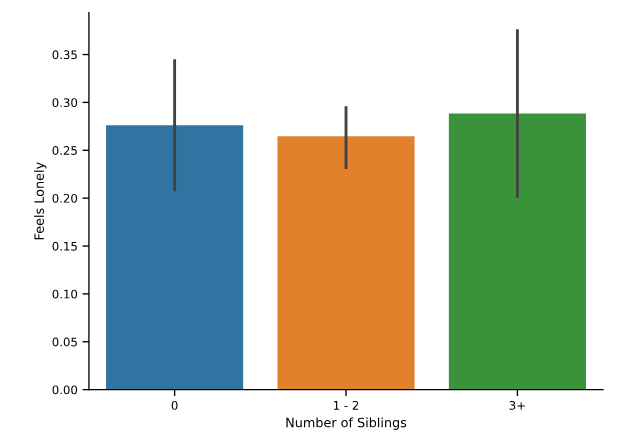

2. Change the context to "notebook" to increase the scale.



```python
# Change the context to "notebook"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely",
            data=survey_data, kind="bar")

# Show plot
plt.show()

```
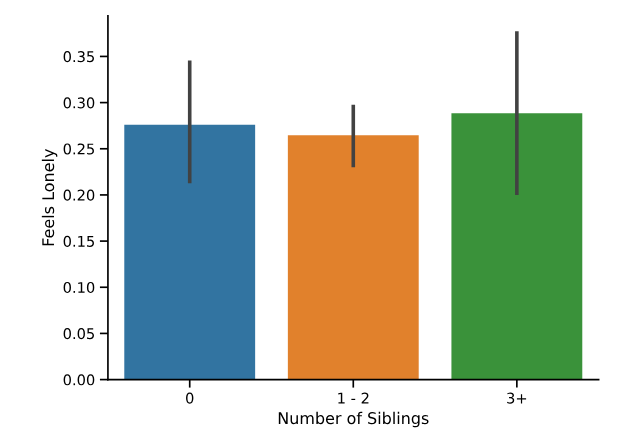

3. Change the context to "talk" to increase the scale.

```python
# Change the context to "talk"
sns.set_context("talk")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely",
            data=survey_data, kind="bar")

# Show plot
plt.show()

```
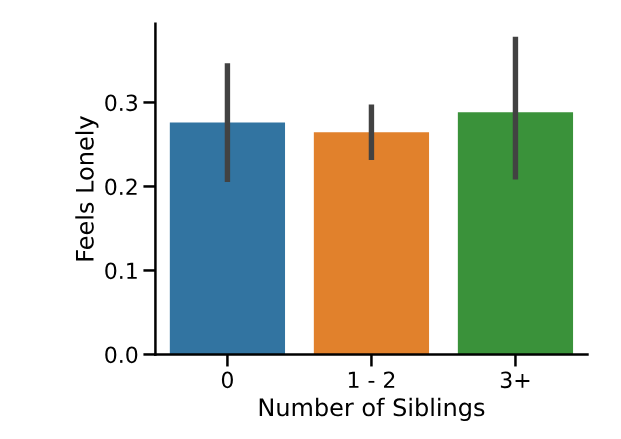



4.Change the context to "poster", which is the largest scale available.

```python
# Change the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Feels Lonely",
            data=survey_data, kind="bar")

# Show plot
plt.show()

```
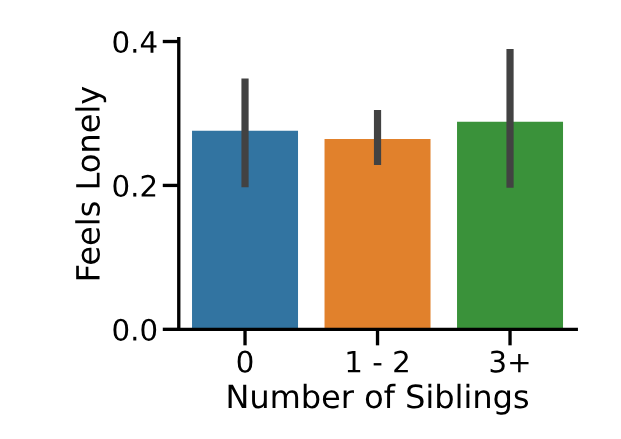

### Exercise
Using a custom palette
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions

Set the style to "darkgrid".
Set a custom color palette with the hex color codes "#39A7D0" and "#36ADA4"

```python
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

```
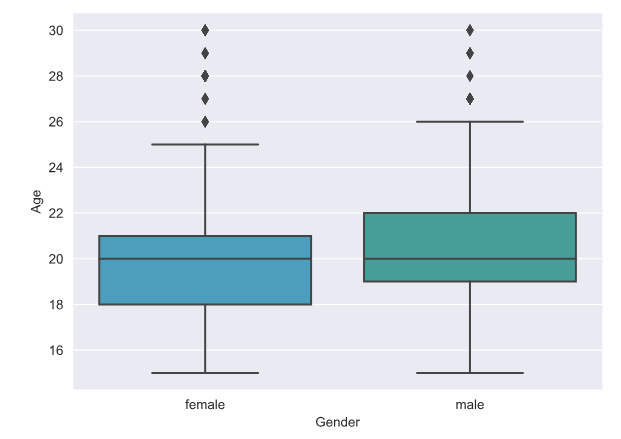

# Adding Titles and Labels: Part 1 (Seaborn v0.13.2)

---

## 1) Adding titles and labels: Part 1

- Clear titles and informative axis labels are essential for communicating insights.
- In this lesson, we focus on:
  - What objects Seaborn plotting functions return (FacetGrid vs. AxesSubplot).
  - How to add a title to FacetGrid figures.
  - How to position/adjust the title height.

---

## 2) Creating informative visualizations

Key points from the comparison example (box plots of birth rates per region):
- A title orients the audience immediately to the subject of the visualization.
- Axis labels should specify units and definitions (e.g., “Birth rate (per 1,000 people)”, “Region (country-level observations)”).
- Rotating x-axis tick labels can improve readability of categorical names.

Why this matters:
- Titles and labels reduce cognitive load and misinterpretation.
- They make plots self-contained and presentation-ready.
---

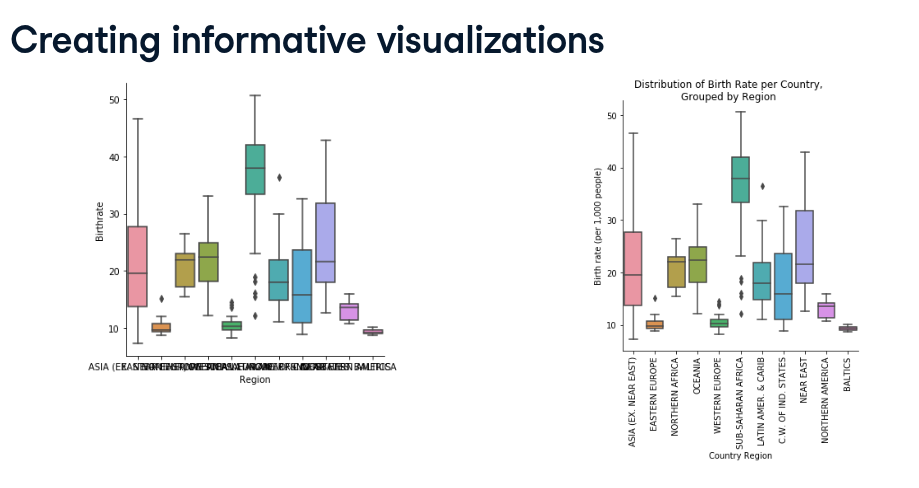

## 3) FacetGrid vs. AxesSubplot objects

Seaborn returns two main object types:
- FacetGrid:
  - Created by functions that can produce subplots, such as `relplot()` and `catplot()`.
  - Represents a figure that may contain one or many subplots (axes).
- AxesSubplot:
  - Created by single-axes functions like `scatterplot()`, `countplot()`, etc.
  - Represents one Matplotlib Axes inside a Figure.

Why you should care:
- How you add titles/labels depends on which object you’re working with.
- FacetGrid titles are set via the figure (`g.fig.suptitle(...)`).
- AxesSubplot titles are set on the axes (`ax.set_title(...)`) — covered in the next lesson.

### 3.1 Identify the object type (AxesSubplot example)

Slides snippet:
- Code: `g = sns.scatterplot(x="height", y="weight", data=df)` then `type(g)` returns `matplotlib.axes._subplots.AxesSubplot`.

Expected output:
- Visual: A single scatterplot of height vs. weight (one axes).
- Textual output (Python repr of type):
  - Something like: `<class 'matplotlib.axes._axes.Axes'>`
  - In some environments or slides you may see: `matplotlib.axes._subplots.AxesSubplot` (older Matplotlib naming). The key idea: it’s an Axes object, not a FacetGrid.

Significance:
- Confirms `scatterplot()` returns an Axes-like object (AxesSubplot), not a FacetGrid. You’ll add titles differently than for FacetGrid.

### 3.2 What is a FacetGrid?

Conceptual points:
- A FacetGrid comprises one or more Axes (subplots).
- Functions like `relplot()` and `catplot()` return FacetGrid because they can create multiple panels via faceting.

Why it matters:
- To add a title to the entire FacetGrid figure, use `g.fig.suptitle(...)`.

---

## 4) Which functions return FacetGrid vs. AxesSubplot?

- FacetGrid creators:
  - `sns.relplot(...)`
  - `sns.catplot(...)`
- AxesSubplot creators (single axes):
  - `sns.scatterplot(...)`
  - `sns.countplot(...)`
  - Many others like `sns.boxplot`, `sns.barplot`, `sns.lineplot` (when called directly)
  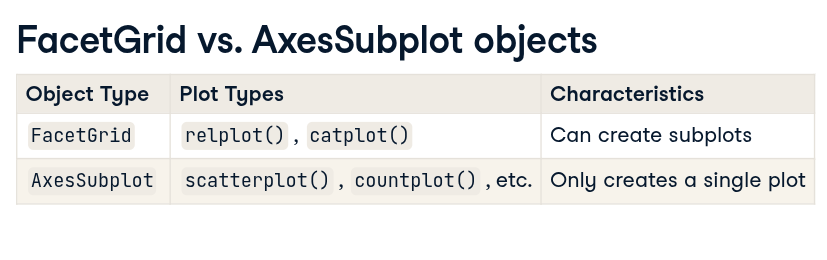

Practical takeaway:
- Always assign the plot to a variable (commonly `g`) and check `type(g)` if unsure.

---

## 5) Adding a title to a FacetGrid

Slides code:
- `g = sns.catplot(x="Region", y="Birthrate", data=gdp_data, kind="box")`
- `g.fig.suptitle("New Title")`
- `plt.show()`
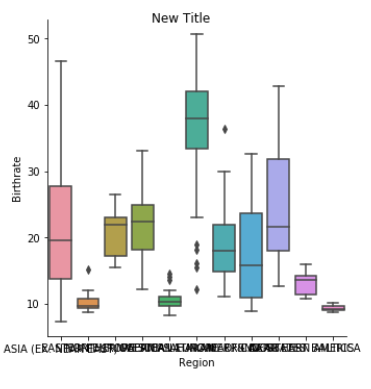

Below, we reproduce and explain this pattern. Assume:
- `gdp_data` contains `Region` (categorical) and `Birthrate` (numeric, e.g., per 1,000 people).

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Example: box plots of Birthrate by Region using catplot (FacetGrid)
g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box"
)

# Add a figure-level title to the FacetGrid
g.fig.suptitle("Birth rates by region (per 1,000 people)")

# Render the figure
plt.show()
```

Expected output (visual description):
- A figure containing a box plot for each region along the x-axis.
- The figure title “Birth rates by region (per 1,000 people)” displayed above the plot area.
- Note: With defaults, the title may appear slightly close to the top of the axes.

Line-by-line explanation:
- `import seaborn as sns`, `import matplotlib.pyplot as plt`:
  - Imports plotting libraries. Purpose: access Seaborn and Matplotlib APIs. Result: modules imported.
- `g = sns.catplot(..., kind="box")`:
  - Creates a box plot faceted structure (even if only 1 subplot). Purpose: use FacetGrid-returning function. Result: `g` is a FacetGrid object.
- `g.fig.suptitle("Birth rates by region (per 1,000 people)")`:
  - Sets a figure-level title via the underlying Matplotlib Figure. Purpose: title for the whole FacetGrid (important when there are multiple subplots). Result: title appears above.
- `plt.show()`:
  - Renders the plot. Purpose: display the chart in the notebook. Result: visualization shown.

Significance:
- `suptitle` ensures the title applies to the entire figure, not just a single axes—crucial when using multi-panel facets.

---

## 6) Adjusting the title height on a FacetGrid

Slides code:
- `g.fig.suptitle("New Title", y=1.03)`

By default, the figure-level title may sit too low. Raise it with `y` slightly above 1.0.

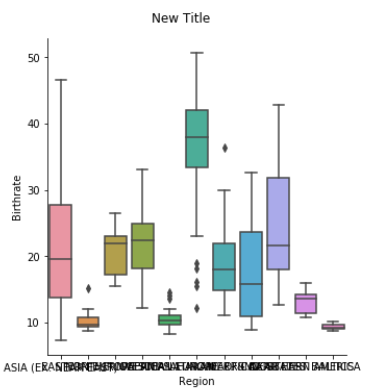

```python
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box"
)

# Raise the title slightly above the default
g.fig.suptitle("Birth rates by region (per 1,000 people)", y=1.03)

plt.show()
```

Expected output (visual description):
- Same box plots.
- The title positioned a bit higher, reducing overlap or crowding with the axes and top of the figure.

Line-by-line explanation:
- `g = sns.catplot(...)`:
  - Creates a FacetGrid with box plots by region. Result: `g` is a FacetGrid.
- `g.fig.suptitle(..., y=1.03)`:
  - `y` controls vertical position in figure coordinates (0 bottom, 1 top). Purpose: give the title breathing room. Result: improved readability and layout.
- `plt.show()`:
  - Renders the figure. Result: figure with better title placement.

Significance:
- Small adjustments (e.g., `y=1.02`–`1.08`) often needed depending on figure size, tight layout, and presence of legends.

Tip:
- If titles overlap with subplots or legends, also consider `plt.tight_layout()` before or after setting suptitle; for FacetGrid, you may need `g.fig.tight_layout()` followed by `g.fig.subplots_adjust(top=...)` to preserve space for the suptitle.

---

---

## 7) Recap

- Seaborn returns either:
  - FacetGrid: from `relplot`, `catplot` (supports subplots). Title via `g.fig.suptitle(...)`.
  - AxesSubplot (Axes): from `scatterplot`, `countplot`, etc. Title via `ax.set_title(...)` (covered next lesson).
- Titles and labels:
  - Essential for clarity; include units and definitions.
  - Adjust positioning to prevent crowding; rotate tick labels when needed.

Explore more in the Seaborn documentation (gallery, tutorials, API) at https://seaborn.pydata.org/.

### Exercise
FacetGrids vs. AxesSubplots
In the recent lesson, we learned that Seaborn plot functions create two different types of objects: FacetGrid objects and AxesSubplot objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name g. Let's identify which type of object it is.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions 1/2

Identify what type of object plot g is and assign it to the variable type_of_g.

```python
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)


<script.py> output:
    <class 'seaborn.axisgrid.FacetGrid'>
```

2. Question
We've just seen that sns.relplot() creates FacetGrid objects. Which other Seaborn function creates a FacetGrid object instead of an AxesSubplot object?1

Possible answers


sns.catplot()

sns.scatterplot()

sns.boxplot()

sns.countplot()

### Exercise
Adding a title to a FacetGrid object
In the previous exercise, we used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a FacetGrid object. Now that we know what type of object it is, let's add a title to this plot.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions

Add the following title to this plot: "Car Weight vs. Horsepower".

```python
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

```
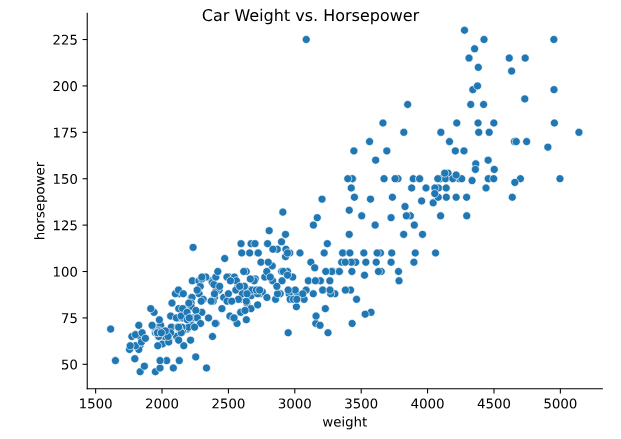

# Adding Titles and Labels: Part 2 — Seaborn (Jupyter Notebook Notes)


---

Topic: Introduction to Data Visualization with Seaborn — Adding titles and labels (Part 2)



---

## 1) Introduction

- We continue customizing plot titles and axis labels in Seaborn.
- Key objects:
  - FacetGrid: a figure with one or more subplots created by functions like sns.catplot
  - AxesSubplot (Axes): a single plot returned by functions like sns.boxplot

---

## 2) Adding a Title to AxesSubplot vs. FacetGrid

Context from the transcript:
- For FacetGrid: use g.fig.suptitle("...").
- For AxesSubplot: assign the plot to a variable and use g.set_title("...", y=...).

### 2.1 FacetGrid: suptitle



Line-by-line explanation:
- import seaborn as sns: Loads Seaborn for statistical plotting.
- import matplotlib.pyplot as plt: Loads Matplotlib’s plotting interface.
- g = sns.catplot(...): Creates a FacetGrid-managed figure with a box plot of Birthrate by Region; returns a FacetGrid object (g).
  - x="Region": Categorical grouping on the x-axis.
  - y="Birthrate": Numeric variable to summarize with box plots.
  - data=gdp_data: Uses the given DataFrame.
  - kind="box": Specifies box plots.
- g.fig.suptitle("New Title", y=1.03): Adds a figure-level title to the FacetGrid; y=1.03 raises it above the default so it doesn’t overlap with subplots.
- plt.show(): Renders the figure in the notebook.

Why it matters:
- suptitle is the correct way to title a FacetGrid figure. It ensures the title applies to the whole figure, not a single subplot.

### 2.2 AxesSubplot: set_title



Line-by-line explanation:
- Imports: as above.
- ax = sns.boxplot(...): Draws a single AxesSubplot; returns an Axes object (ax), not a FacetGrid.
- ax.set_title("New Title", y=1.03): Sets the title for this specific Axes. y moves the title vertically within the axes coordinate system.
- plt.show(): Displays the plot.

Why it matters:
- set_title is the right method for single-Axes plots. Using suptitle here would be inappropriate since there’s no FacetGrid.


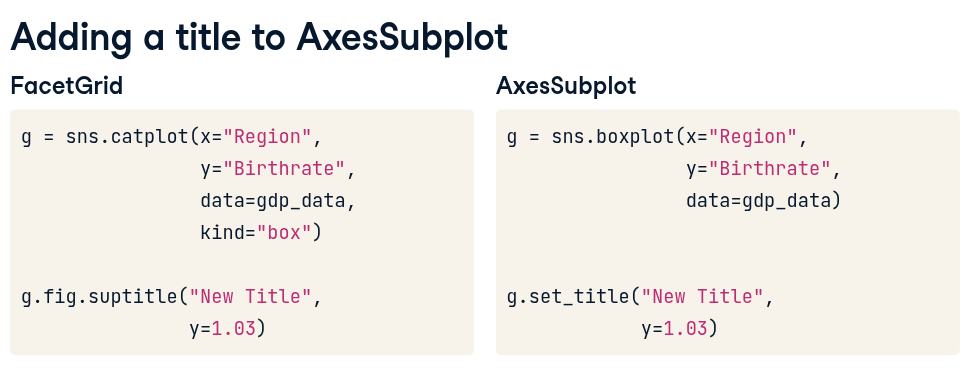


## 3) Titles for Subplots (FacetGrid with col)

Context:
- When using col="Group", Seaborn creates a subplot for each unique value in Group.
- Use g.fig.suptitle for the overall figure.
- Use g.set_titles to set titles for each subplot, optionally including the column value via {col_name}.

### 3.1 Create subplots with col

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with subplots per group
g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box",
    col="Group"
)

plt.show()
```
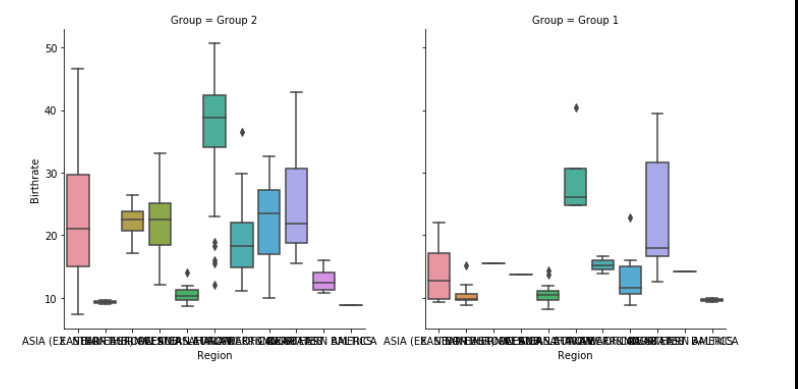


Expected output:
- Multiple box plot subplots arranged in columns, one for each Group (e.g., Group 1 and Group 2).
- Default subplot titles show as Group = <value> per facet.

Line-by-line explanation:
- Imports: as before.
- g = sns.catplot(..., col="Group"): Creates a FacetGrid with separate subplots for each unique Group. The return is a FacetGrid (g).
- plt.show(): Renders the grid of subplots.

Why it matters:
- col facets your visualization by a category, improving clarity when comparing subsets.

### 3.2 Add a figure-level title to the FacetGrid

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box",
    col="Group"
)

# Add a shared title for the entire figure
g.fig.suptitle("New Title", y=1.03)

plt.show()
```
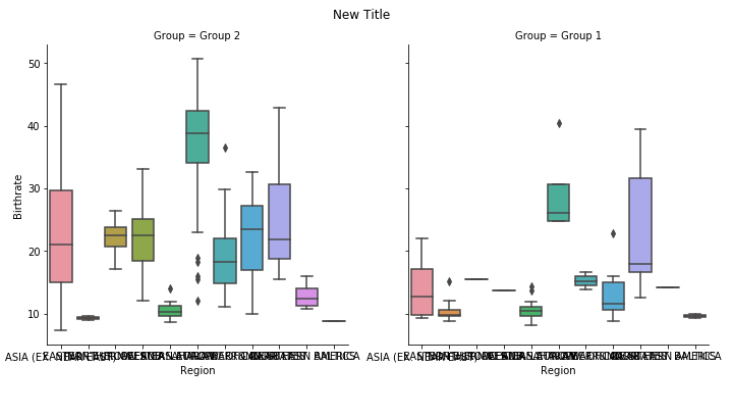
    
Expected output:
- Same grid of subplots as above, with a single overarching title “New Title” centered above all subplots.

Line-by-line explanation:
- g = sns.catplot(...): Creates the faceted figure.
- g.fig.suptitle("New Title", y=1.03): Places a global title above the entire grid; y avoids overlap with top row subplots.
- plt.show(): Displays the figure.

Why it matters:
- suptitle keeps the figure coherent with one descriptive title across all facets.

### 3.3 Customize each subplot’s title using set_titles

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box",
    col="Group"
)

# Global figure title
g.fig.suptitle("New Title", y=1.03)

# Set per-subplot titles; {col_name} inserts the facet's column value
g.set_titles("This is {col_name}")

plt.show()
```
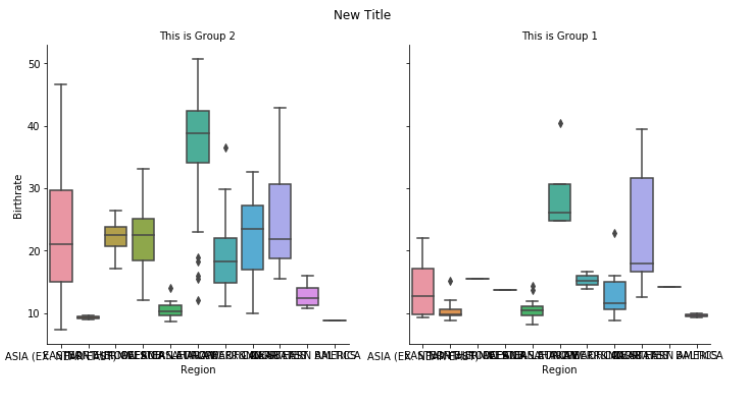
    
Expected output:
- An overall title “New Title”.
- Each facet’s title reads “This is <group_value>” (e.g., “This is Group 1”, “This is Group 2”).

Line-by-line explanation:
- g = sns.catplot(..., col="Group"): Creates the FacetGrid with one subplot per Group.
- g.fig.suptitle("New Title", y=1.03): Adds the figure-level title.
- g.set_titles("This is {col_name}"): Formats each facet’s title with the column value for that facet using {col_name}.
- plt.show(): Renders the figure.

Why it matters:
- set_titles enables dynamic, informative facet titles, tying each subplot to its subset.

---

## 4) Adding Axis Labels

Context:
- Use the set method to set xlabel and ylabel.
- Works for both FacetGrid and AxesSubplot.

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid example, but the same .set(...) call works with Axes too
g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box"
)

# Set axis labels for the plot(s)
g.set(xlabel="New X Label", ylabel="New Y Label")

plt.show()
```
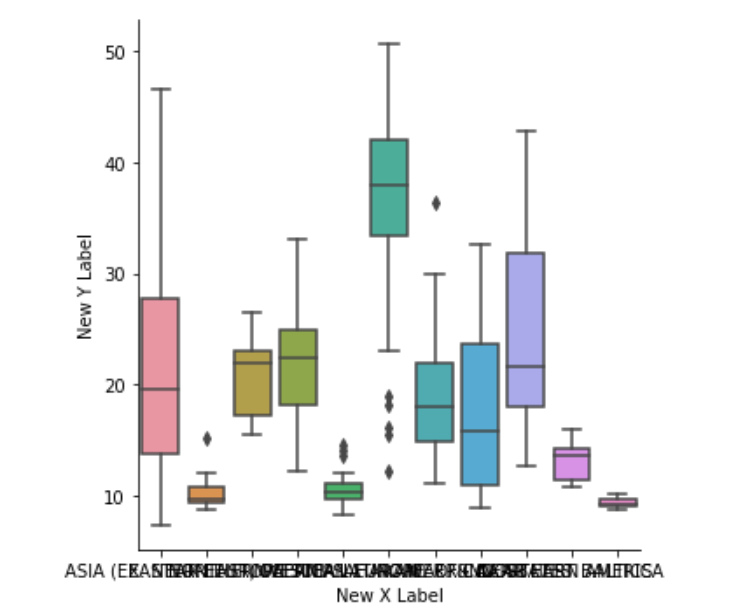
    
Expected output:
- A box plot with x-axis labeled “New X Label” and y-axis labeled “New Y Label”.
- If g were faceted, each subplot would reflect these axis label settings where applicable.

Line-by-line explanation:
- g = sns.catplot(...): Builds a FacetGrid.
- g.set(xlabel="New X Label", ylabel="New Y Label"): Applies axis label settings to the FacetGrid (or Axes, if you used an Axes). For FacetGrid, this sets the labels for all axes in the grid.
- plt.show(): Displays the figure.

Why it matters:
- Clear axis labels make your plot interpretable and publication-ready.

Note:
- If you used an Axes (e.g., ax = sns.boxplot(...)), you could call ax.set(xlabel="...", ylabel="...") or ax.set_xlabel(...) and ax.set_ylabel(...).

---

## 5) Rotating X-axis Tick Labels

Context:
- When category names are long or numerous, rotate tick labels to avoid overlap.
- Use Matplotlib’s plt.xticks(rotation=...) after creating the plot. Works for both FacetGrid and Axes.

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot (FacetGrid example)
g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box"
)

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()
```
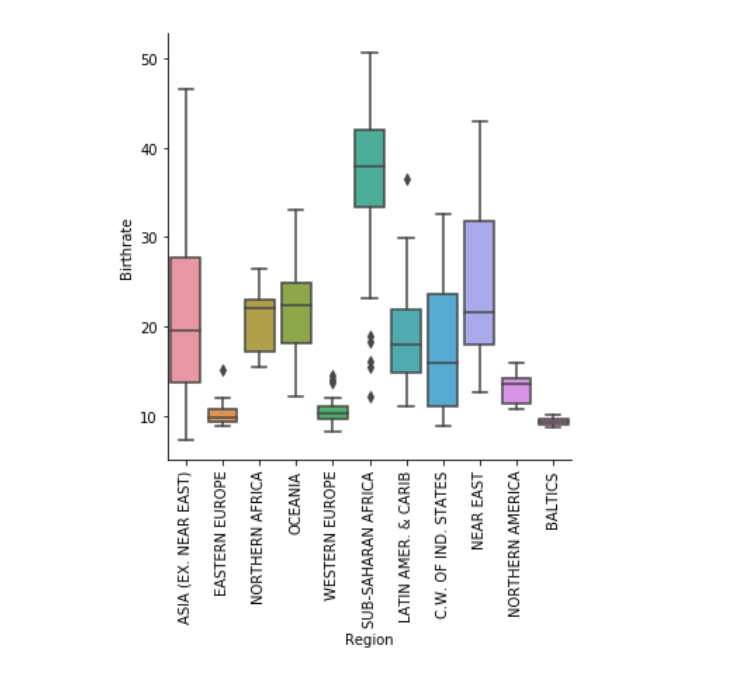
    
Expected output:
- Same plot as before, but x-axis tick labels rotated vertically (90 degrees), making them readable even if long.

Line-by-line explanation:
- g = sns.catplot(...): Generates the plot managed by FacetGrid.
- plt.xticks(rotation=90): Calls Matplotlib to rotate current axes’ x tick labels by 90 degrees. If using FacetGrid with multiple axes, you may need to iterate through axes: for ax in g.axes.flat: plt.sca(ax); plt.xticks(rotation=90).
- plt.show(): Renders the figure.

Why it matters:
- Rotating tick labels prevents overlap, enhancing readability.

Advanced note for multiple facets:
```python
# Ensure rotation applies to all facets in a grid
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
```

---

## 6) Let’s Practice!

- Combine these techniques:
  - Decide whether your plot is a single Axes or a FacetGrid.
  - For global titles on FacetGrid, use g.fig.suptitle(...).
  - For single Axes titles, use ax.set_title(...).
  - For per-facet titles, use g.set_titles("... {col_name} ...").
  - Set axis labels with set(xlabel=..., ylabel=...).
  - Improve readability with rotated tick labels when needed.

Example putting it all together:

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Faceted box plots of Birthrate by Region, split by Group
g = sns.catplot(
    x="Region",
    y="Birthrate",
    data=gdp_data,
    kind="box",
    col="Group",
    col_wrap=None,  # one row (default), adjust if many groups
    sharey=True
)

# Global title
g.fig.suptitle("Birthrates by Region Across Groups", y=1.05)

# Per-facet titles using the group value
g.set_titles("Group: {col_name}")

# Axis labels
g.set(xlabel="Region", ylabel="Birthrate (per 1,000 people)")

# Rotate tick labels on all facets for readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.show()
```

Expected output:
- A neat grid of box plots, one per Group.
- Clear global and per-facet titles.
- Labeled axes.
- Legible rotated x-axis labels.

Line-by-line explanation highlights:
- col="Group": Creates one subplot per group, enabling side-by-side comparison.
- suptitle: Provides a unifying description for the figure.
- set_titles: Clarifies the identity of each facet.
- set(xlabel=..., ylabel=...): Communicates what each axis represents.
- Rotation loop: Ensures every facet’s tick labels are readable.

Significance:
- These small customizations dramatically improve clarity and professionalism of visualizations, especially when sharing with stakeholders or including in reports.
    


### Exercise
Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the lineplot() function. Note that lineplot() does not support the creation of subplots, so it returns an AxesSubplot object instead of an FacetGrid object.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions 1/2

Add the following title to the plot: "Average MPG Over Time".

```python
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Show plot
plt.show()

```
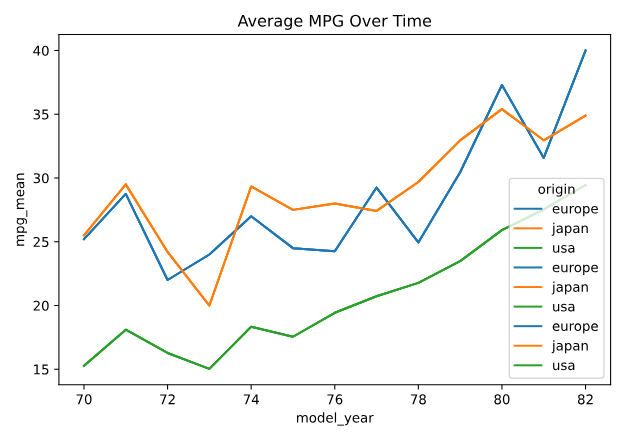

2. Label the x-axis as "Car Model Year" and the y-axis as "Average MPG".

```python

# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")


# Show plot
plt.show()
```
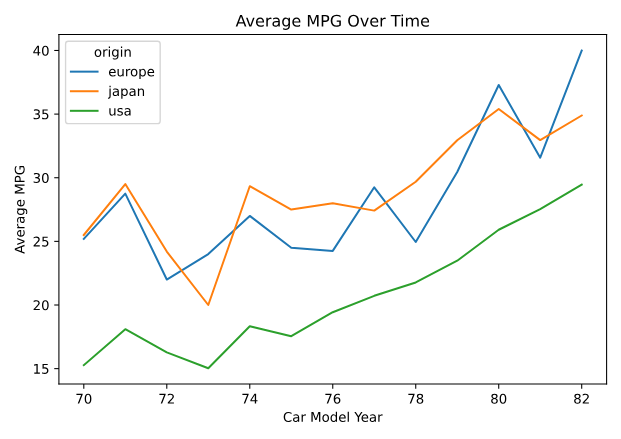

### Exercise
Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions

Rotate the x-tick labels 90 degrees.

```python
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()
```
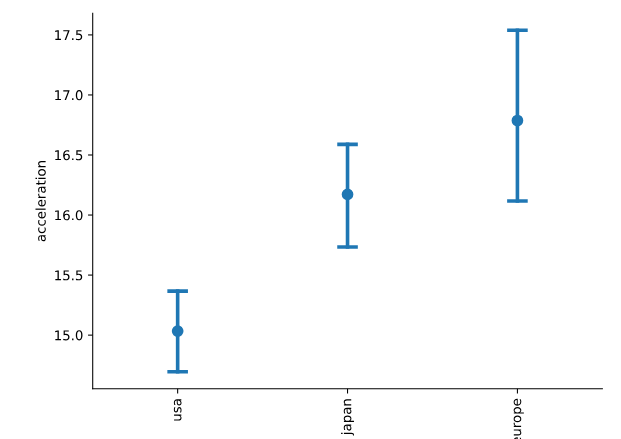


# Seaborn Review: Putting It All Together (Jupyter Notebook Notes)

Source: seaborn: statistical data visualization — seaborn 0.13.2 documentation (https://seaborn.pydata.org/).  

Assumptions:
- You have a tidy pandas DataFrame named df with relevant columns for the examples. Where possible, we’ll also show examples using seaborn’s built-in sample datasets for reproducibility.
- Libraries installed: seaborn (0.13.2), matplotlib, pandas, numpy.


---

## 1) Putting It All Together

- Goal: Review how to use Seaborn effectively to create informative, attractive statistical graphics.
- Seaborn provides a high-level API (per the documentation’s Tutorial and API sections) to quickly build relational and categorical plots, customize aesthetics, add titles/labels, and facet across subgroups.

---

## 2) Getting Started

We import Seaborn and Matplotlib and render figures with plt.show().

Code:
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Optional: load a sample dataset from seaborn for reproducible examples
tips = sns.load_dataset("tips")
```

Expected output:
- No visual output yet; the imports succeed silently.
- A DataFrame named tips is loaded with columns like total_bill, tip, sex, smoker, day, time, size.

Line-by-line explanation:
- import seaborn as sns: Loads Seaborn’s plotting API as sns for convenience.
- import matplotlib.pyplot as plt: Imports Matplotlib’s plotting interface for figure display and fine control.
- import pandas as pd: Brings in pandas for DataFrame manipulation (often needed alongside seaborn).
- tips = sns.load_dataset("tips"): Loads a tidy example dataset shipped with seaborn, letting us demonstrate plots without external files.

Why it matters:
- Seaborn builds on Matplotlib; you typically call plt.show() to display the figure in notebooks or scripts.
- Having a tidy DataFrame aligns with Seaborn’s API design (long-form data).

---

## 3) Relational Plots

Relational plots show relationships between two quantitative variables. Examples:
- Scatter plots
- Line plots

Using relplot() (a Figure-level function that returns a FacetGrid), as documented in Seaborn’s “Relational plots” tutorial and API.

Code (scatter example):
```python
# Scatter plot: total_bill vs tip
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter" # either "line"
)

plt.show()
```

Expected output:
- A scatter plot with each point representing a meal: x-axis total_bill, y-axis tip.
- A FacetGrid object g manages the figure; default theme and legend (none needed here) apply.

Line-by-line explanation:
- g = sns.relplot(...): Creates a figure-level relational plot (FacetGrid). 
  - x="total_bill": Quantitative variable on the x-axis.
  - y="tip": Quantitative variable on the y-axis.
  - data=tips: Uses the tips dataset.
  - kind="scatter": Chooses a scatter plot.
- plt.show(): Renders the plot in the output cell.

Why it matters:
- Scatter plots reveal patterns like linear trends, heteroscedasticity, and outliers between two numeric variables.
- Line plots are suitable for ordered x-variables or trends (time, sequence, size categories).

---

## 4) Categorical Plots

Categorical plots describe the distribution of a quantitative variable across categories. Examples:
- Bar plots
- Count plots
- Box plots
- Point plots

Using catplot() (a Figure-level function returning a FacetGrid), as in Seaborn’s “Categorical plots” tutorial and API.

Code (bar example):
```python
# Bar plot: average tip by day
g = sns.catplot(
    x="day",
    y="tip",
    data=tips,
    kind="bar",
    ci="sd"
)

plt.show()
```

Expected output:
- A bar plot with mean tip for each day, with error bars representing standard deviation.

Line-by-line explanation:
- g = sns.catplot(..., kind="bar"): Computes and plots the mean of tip for each category in day.
- ci="sd": Shows variability with standard deviation bars rather than a confidence interval.
- plt.show(): Renders.

Why it matters:
- Bar plots summarize central tendency across categories; error bars signal variability.

Code (count example):
```python
# Count plot: number of records per day
g = sns.catplot(
    x="day",
    data=tips,
    kind="count"
)

plt.show()
```

Expected output:
- Bars showing how many observations occur on each day.

Line-by-line explanation:
- kind="count": Counts rows per category (no y is needed).
- plt.show(): Displays the figure.

Why it matters:
- Count plots reveal sample sizes or frequency distributions of categories.

Code (box example):
```python
# Box plot: tip distribution by day
g = sns.catplot(
    x="day",
    y="tip",
    data=tips,
    kind="box"
)

plt.show()
```

Expected output:
- Box-and-whisker plots showing median, quartiles, and potential outliers per day.

Line-by-line explanation:
- kind="box": Shows distribution shape and outliers per category.
- plt.show(): Renders.

Why it matters:
- Box plots provide robust distribution summaries, aiding comparisons across categories.

Code (point example):
```python
# Point plot: average tip by day with error bars
g = sns.catplot(
    x="day",
    y="tip",
    data=tips,
    kind="point",
    ci=95
)

plt.show()
```

Expected output:
- Points connected by lines showing mean tip per day with 95% CI error bars.

Line-by-line explanation:
- kind="point": Emphasizes central tendency trends across categories.
- ci=95: Confidence intervals for the mean.
- plt.show(): Displays.

Why it matters:
- Point plots highlight pattern direction and uncertainty.

---

## 5) Adding a Third Variable (hue)

Setting hue creates subgroups in a single plot with different colors (as described in Seaborn docs for relational/categorical plots and multi-plot objects).

Code (hue with scatter):
```python
# Scatter with hue by smoker status
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    hue="smoker"
)

plt.show()
```
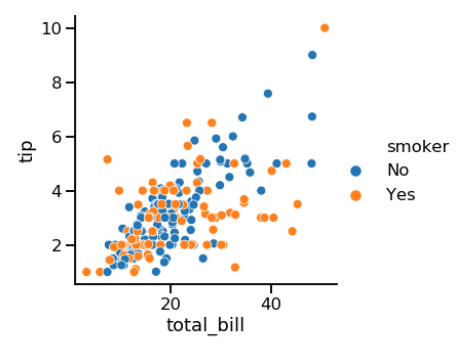

Expected output:
- Scatter plot with two colors for smoker = Yes/No; legend indicates mapping.

Line-by-line explanation:
- hue="smoker": Encodes the smoker category with color on a single axes within the FacetGrid figure.
- plt.show(): Renders.

Why it matters:
- Hue adds categorical context without creating multiple subplots, aiding comparison within the same coordinate space.


---

## 6) Adding a Third Variable (row/col)

Using row and/or col in relplot() or catplot() creates subplots (facets) per subgroup, leveraging Seaborn’s “Multi-plot grids”.

Code (faceting columns):
```python
# Facet by time (Lunch vs Dinner) using columns
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    col="time"
)

plt.show()
```
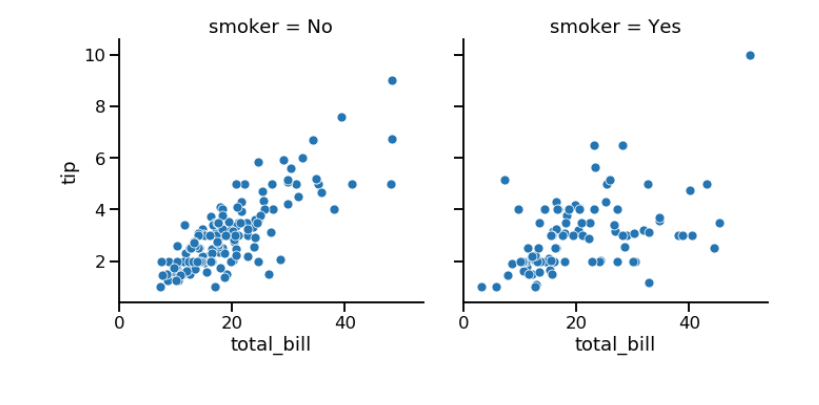

Expected output:
- Two subplots side-by-side: one for Lunch, one for Dinner.

Line-by-line explanation:
- col="time": Creates separate axes for each unique time, returning a FacetGrid with multiple Axes.
- plt.show(): Renders the grid.

Why it matters:
- Faceting separates groups to avoid overplotting and clarifies subgroup patterns.

Code (row and col together):
```python
# Facet by row and col: smoker (rows) and time (cols)
g = sns.catplot(
    x="day",
    y="tip",
    data=tips,
    kind="box",
    row="smoker",
    col="time"
)

plt.show()
```

Expected output:
- A 2x2 grid (if both smoker and time have two levels), each facet showing box plots by day.

Line-by-line explanation:
- row="smoker", col="time": Creates a multi-dimensional grid of subplots.
- plt.show(): Displays.

Why it matters:
- Facets enable structured comparisons across multiple categorical dimensions.

---

## 7) Customization

Seaborn offers figure theming and context settings (see “Figure theming”, “Color palettes” docs):
- sns.set_style(): Background/axes style
- sns.set_palette(): Color palette
- sns.set_context(): Scale elements for contexts like paper, notebook, talk, poster

Code:
```python
# Customize global aesthetics
sns.set_style("whitegrid")         # Options include: white, dark, whitegrid, darkgrid, ticks
sns.set_palette("deep")            # Choose palette by name or list of colors
sns.set_context("talk", font_scale=1.1)  # Scale elements for presentation

# Example plot to show the effect
g = sns.relplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="scatter",
    hue="sex"
)

plt.show()
```

Expected output:
- Scatter plot with a whitegrid background, “deep” palette colors, and slightly larger text/markers suitable for talks.

Line-by-line explanation:
- sns.set_style("whitegrid"): Sets a background with grid lines to aid reading values.
- sns.set_palette("deep"): Applies a color palette globally to future plots.
- sns.set_context("talk", font_scale=1.1): Enlarges plot elements appropriate for talk slides; font_scale slightly increases font sizes.
- g = sns.relplot(...): The plot reflects the specified style, palette, and context.
- plt.show(): Renders.

Why it matters:
- Consistent theming improves readability and professional appearance across figures.

---

## 8) Adding a Title

Two object types:
- FacetGrid from relplot()/catplot(): title via g.fig.suptitle()
- AxesSubplot from axes-level functions (e.g., scatterplot(), boxplot(), countplot()): title via ax.set_title()

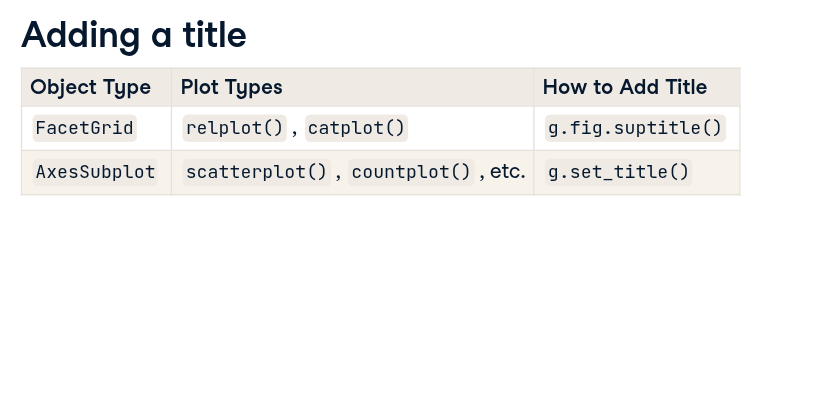

Code (FacetGrid title):
```python
# Figure-level title on a FacetGrid
g = sns.catplot(
    x="day",
    y="tip",
    data=tips,
    kind="bar",
    hue="time"
)

g.fig.suptitle("Average Tip by Day and Time", y=1.02)
plt.show()
```

Expected output:
- Bar chart facets in one figure (single facet here, multiple hues), with a centered figure-level title slightly above the plot.

Line-by-line explanation:
- g = sns.catplot(...): Returns a FacetGrid.
- g.fig.suptitle("...", y=1.02): Adds a global figure title; y raises it to avoid overlap with axes.
- plt.show(): Displays.

Why it matters:
- suptitle describes the entire figure, especially useful when multiple subplots are present.

Code (AxesSubplot title):
```python
# Axes-level title on a single axes function
ax = sns.boxplot(
    x="day",
    y="tip",
    data=tips
)

ax.set_title("Tip Distribution by Day", y=1.02)
plt.show()
```

Expected output:
- A single box plot figure with an axes-level title above it.

Line-by-line explanation:
- ax = sns.boxplot(...): Returns a Matplotlib Axes instance.
- ax.set_title("...", y=1.02): Sets the title for that axes only.
- plt.show(): Renders.

Why it matters:
- Axes titles are appropriate for single-axes figures, distinct from figure-level titles.

---

## 9) Final Touches (Axis Labels and Tick Rotation)

Use g.set(xlabel=..., ylabel=...) and plt.xticks(rotation=...). Works for both FacetGrid and Axes.


Why it matters:
- Clear axis labels and readable ticks are essential for interpretation and presentation.

- Fine control over ticks prevents overlap and enhances clarity.

---

## 10) Let’s Practice! (Putting All Steps Together)

This end-to-end example uses:
- relplot/catplot selection
- hue for color subgroups
- row/col for faceting
- theming with set_style, set_palette, set_context
- titles for FacetGrid and Axes
- axis labels and tick rotations


---

## Quick Reference (from Seaborn docs navigation)

- Installing, Gallery, Tutorial, API: See the site to explore features and code examples.
- Features covered here:
  - Relational plots: relplot (scatter, line)
  - Categorical plots: catplot (bar, count, box, point)
  - Multi-plot grids: row/col faceting; figure-level suptitle; per-facet set_titles
  - Figure theming: set_style, set_palette, set_context
  - Color palettes and accessibility: choose palettes like "deep" or "colorblind"


### Exercise

Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

Instructions

Set the color palette to "Blues".
Add subgroups to color the box plots based on "Interested in Pets".
Set the title of the FacetGrid object g to "Age of Those Interested in Pets vs. Not".
Make the plot display using a Matplotlib function.


```python
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Interested in Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

```
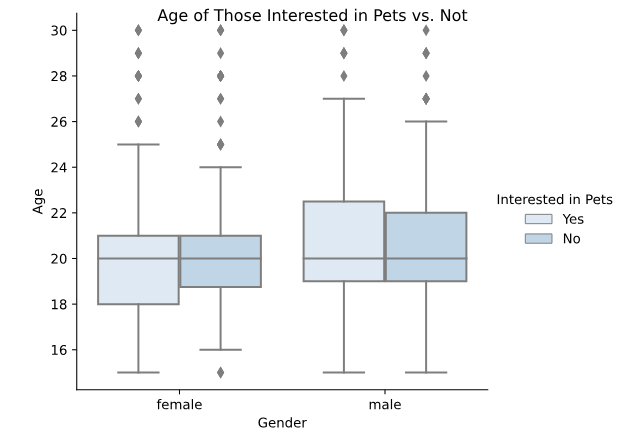

### Exercise
Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music ("Likes Techno") varies by their gender ("Gender") or where they live ("Village - town"). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions

Set the figure style to "dark".
Adjust the bar plot code to add subplots based on "Gender", arranged in columns.
Add the title "Percentage of Young People Who Like Techno" to this FacetGrid plot.
Label the x-axis "Location of Residence" and y-axis "% Who Like Techno".

```python
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col='Gender')

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

```
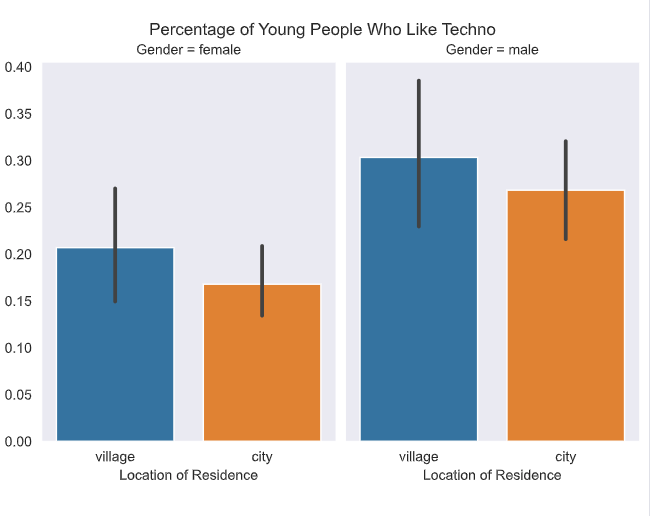

# What's Next? Final Notes on Seaborn and Data Visualization

---

## 1. Next Steps

.
- **Next steps:**  
  Let’s review where Seaborn fits in the data workflow and how you can continue to build your skills.

---

## 2. Where Does Seaborn Fit in the Data Analysis Workflow?

- **Seaborn** is a powerful Python library for creating attractive and informative statistical visualizations with minimal code.
- **Place in workflow:**  
    - **Exploratory Data Analysis (EDA):**  
      Use Seaborn to quickly understand distributions, relationships, and patterns in your data.
    - **Communication:**  
      Use Seaborn to create publication-quality plots to share your findings with others.
---

![image.png](attachment:image.png)

## 3. Building on What You’ve Learned

### 3.1. Explore and Communicate Results

- **What you’ve covered:**  
    - The most common visualizations for data exploration (e.g., scatter plots, box plots).
    - Basic customization of Seaborn plots with Matplotlib.
- **Next steps:**  
    - Learn about advanced Seaborn visualizations (e.g., regression plots, multi-plot grids).
    - Explore **advanced Matplotlib customizations** for even more control over your visualizations.

---
![image-2.png](attachment:image-2.png)

### 3.2. Gather Data

- **Data Collection:**  
    - Gathering data is the first step in any analysis.
    - **What to learn next:**  
        - How to import data using Python (e.g., `pandas.read_csv`, `pandas.read_excel`).
        - How to retrieve data from databases using SQL.

---

### 3.3. Transform and Clean Data

- **Data Cleaning:**  
    - Seaborn works best with tidy `pandas` DataFrames.
    - **What to learn next:**  
        - How to load data into a DataFrame.
        - How to clean data (handle missing values, fix datatypes, etc.).
        - How to reshape data into tidy (long-form) format appropriate for Seaborn.

#### Example: Loading and Tidying Data

```python
import pandas as pd

# Load data
df = pd.read_csv("my_data.csv")

# Clean: remove missing values
df_clean = df.dropna()

# Tidy: melt wide-format data into long-format (if needed)
df_long = pd.melt(df_clean, id_vars=["category"], var_name="variable", value_name="value")

df_long.head()
```

#### Expected Output

```plaintext
  category variable  value
0      A      col1    1.0
1      B      col1    2.0
2      C      col1    3.0
3      A      col2    4.0
4      B      col2    5.0
```

**Explanation:**
- `import pandas as pd`: Import pandas for data handling.
- `pd.read_csv("my_data.csv")`: Read data from a CSV file.
- `.dropna()`: Remove rows with missing values (data cleaning).
- `pd.melt(...)`: Convert data from wide to long format (tidying for Seaborn compatibility).
- `df_long.head()`: Preview the first few rows.

**Significance:**  
- Clean and tidy data is essential for accurate and effective visualizations with Seaborn.

---

### 3.4. Analyze and Build Models

- **Statistical Analysis:**  
    - Seaborn integrates simple statistical summaries, such as confidence intervals in bar plots.
    - **What to learn next:**  
        - How confidence intervals are calculated.
        - How to interpret statistical results from your plots.

#### Example: Confidence Intervals in Seaborn Bar Plot

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

sns.barplot(x="day", y="total_bill", data=tips)
plt.show()
```

#### Expected Output

- A bar plot of total bill by day, with **vertical lines on each bar** indicating the **95% confidence interval** for the mean.

**Explanation:**
- `sns.barplot(...)`: Draws bar plot with automatic confidence intervals.
- Confidence intervals show the uncertainty in the estimate of the mean for each group.

**Significance:**  
- Understanding and interpreting these intervals is crucial for drawing valid conclusions from your data.

---

## 4. Summary Table: Seaborn and the Data Workflow

| Step                          | Tools & Skills to Explore Next          |
|-------------------------------|----------------------------------------|
| Gather data                   | Python (`pandas`), SQL                 |
| Transform and clean data      | `pandas` DataFrames, tidying, cleaning |
| Explore & communicate results | Seaborn advanced plots, Matplotlib     |
| Analyze & build models        | Statistical analysis, confidence intervals |

---

## 5. END!

- You’ve covered:
    - The basics of Seaborn and its integration with data analysis
    - How to create, customize, and interpret a variety of plots
    - Where to go next in your data science journey
.

---

*End of notes.*